In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
dtypes = {
    'num': 'int16',
    'gender': 'category',
    'age': 'int16',
    'G': 'int16',
    'S': 'int16',
    'ALB': 'float16', 'TB': 'float16',
    'ALT': 'float16', 'AST': 'float16', 'GGT': 'float16',
    'ALP': 'float16', 'Cr': 'float16', 'BUN': 'float16', 'lg.DNA': 'float16', 'lg.Ag': 'float16', 'eAg': 'int16',
    'WBC': 'float16', 'N': 'float16', 'Hb': 'int16', 'PLT': 'int16',
    'PTA': 'int16', 'INR': 'float16', 'APTT': 'float16', 'AFP': 'float16'
}

In [53]:
dtypes = {
    'num': 'int16',
    'gender': 'category',
    'age': 'int16',
    'G': 'int16',
    'S': 'int16',
    'ALB': 'float16', 'TB': 'float16',
    'ALT': 'float16', 'AST': 'float16', 'GGT': 'float16',
    'ALP': 'float16', 'Cr': 'float16', 'BUN': 'float16', 'lg.DNA': 'float16', 'lg.Ag': 'float16', 'eAg': 'int16',
    'WBC': 'float16', 'N': 'float16', 'Hb': 'int16', 'PLT': 'int16',
    'PTA': 'int16', 'INR': 'float16', 'APTT': 'float16', 'AFP': 'float16'
}
train = pd.read_csv("p_data.csv")
train['PTA'] = pd.to_numeric(train['PTA'], errors='coerce')
train = train.dropna()
train = train.drop(columns=['num'])
train.head(1000)

,gender,age,G,S,ALB,TB,ALT,AST,GGT,ALP,...,lg.Ag,eAg,WBC,N,Hb,PLT,PTA,INR,APTT,AFP
0,1,44,4,1,40.0,41.4,281.0,58.0,109.0,75.0,...,1.61,1,5.5,3.0,141,125,92.00,1.05,39.0,7.76
2,1,41,1,0,45.0,16.7,41.0,34.0,90.0,58.0,...,3.27,1,4.4,3.1,144,267,132.00,0.87,30.0,7.62
4,0,22,2,0,44.0,21.0,88.0,54.0,17.0,69.0,...,4.14,1,7.4,4.9,151,275,110.00,0.95,32.1,1.96
5,1,27,3,1,39.0,22.8,87.0,38.0,69.0,73.0,...,4.13,1,6.8,3.6,136,236,100.00,1.00,38.6,16.62
6,0,28,3,1,45.0,17.3,205.0,174.0,37.0,78.0,...,3.64,1,4.3,1.3,135,229,94.00,1.04,41.1,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1,32,1,0,44.2,21.9,55.9,39.1,16.4,120.3,...,4.41,1,4.6,2.8,156,154,91.30,1.12,31.3,2.08
332,0,38,1,0,35.5,14.9,11.2,16.2,9.2,44.0,...,2.85,0,5.2,3.3,109,141,106.52,1.01,30.9,3.04
333,0,47,1,1,46.0,8.5,24.9,31.4,21.3,28.0,...,0.81,1,6.1,2.9,134,197,94.57,1.10,44.8,1.47
334,1,33,1,1,34.5,51.9,584.7,440.1,197.3,174.8,...,3.13,1,5.8,2.3,147,175,84.00,1.16,43.4,56.14


In [54]:
train[train.isnull().any(axis=1)]['S'].value_counts()

Series([], Name: count, dtype: int64)

In [55]:
%%time
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

CPU times: user 2.75 ms, sys: 2.55 ms, total: 5.3 ms
Wall time: 8.58 ms


In [ ]:
missing_train_data

In [ ]:
excludes = [ ]
for col_name in train.columns:
    if col_name in excludes:
        continue
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    sns.kdeplot(train.loc[train['G'] == 0, col_name], ax=ax[0], label='G(0)')
    sns.kdeplot(train.loc[train['G'] == 1, col_name], ax=ax[0], label='G(1)')

    train.loc[train['G'] == 0, col_name].hist(ax=ax[1])
    train.loc[train['G'] == 1, col_name].hist(ax=ax[1])
    ax[1].legend(['G(0)', 'G(1)'])
    fig.suptitle(col_name)
    plt.show()

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [67]:
features = train.columns.values.tolist()

In [68]:
features.remove("S")

In [72]:
x = train.loc[:, features].values
y = train.loc[:, ['S']].values
x = StandardScaler().fit_transform(x)

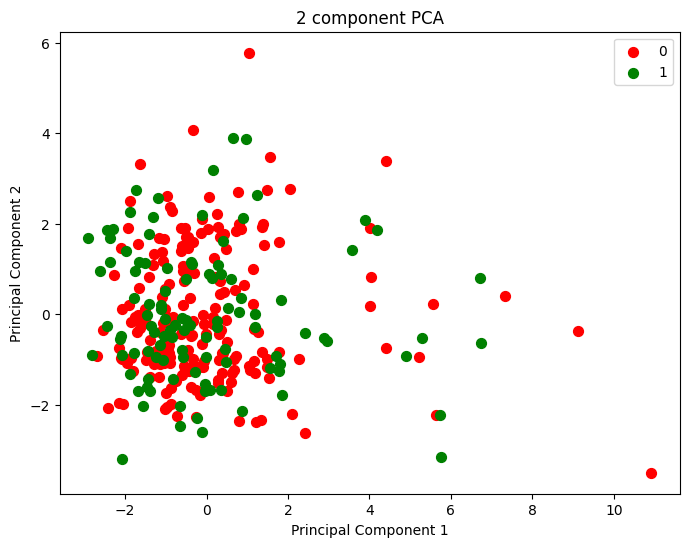

In [75]:
# PCA降维
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# 合并目标变量
finalDf = pd.concat([principalDf, train[['S']]], axis=1)

# 可视化
plt.figure(figsize=(8, 6))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['S'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c=color,
                s=50)
plt.legend(targets)
plt.show()

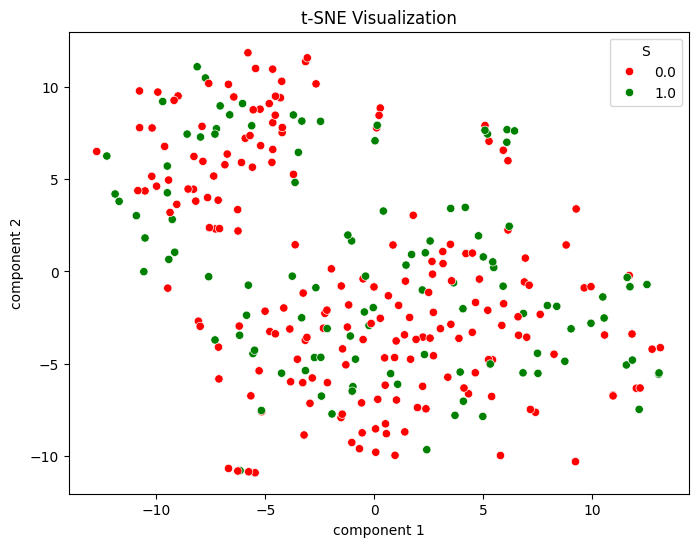

In [98]:
from sklearn.manifold import TSNE

# t-SNE降维
tsne = TSNE(n_components=2, perplexity=40, n_iter=5000)
tsne_results = tsne.fit_transform(x)
tsneDf = pd.DataFrame(data=tsne_results, columns=['component 1', 'component 2'])

# 合并目标变量
finalDf = pd.concat([tsneDf, train[['S']]], axis=1)

# 可视化
# plt.figure(figsize=(8, 6))
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('t-SNE')
# targets = [0, 1]
# colors = ['r', 'g']
# for target, color in zip(targets, colors):
#     indicesToKeep = finalDf['S'] == target
#     plt.scatter(finalDf.loc[indicesToKeep, 'component 1'],
#                 finalDf.loc[indicesToKeep, 'component 2'],
#                 c=color,
#                 s=50)
# 使用Seaborn可视化
plt.figure(figsize=(8, 6))
sns.scatterplot(x='component 1', y='component 2', hue='S', data=finalDf, palette=['red', 'green'])
plt.title('t-SNE Visualization')
plt.show()

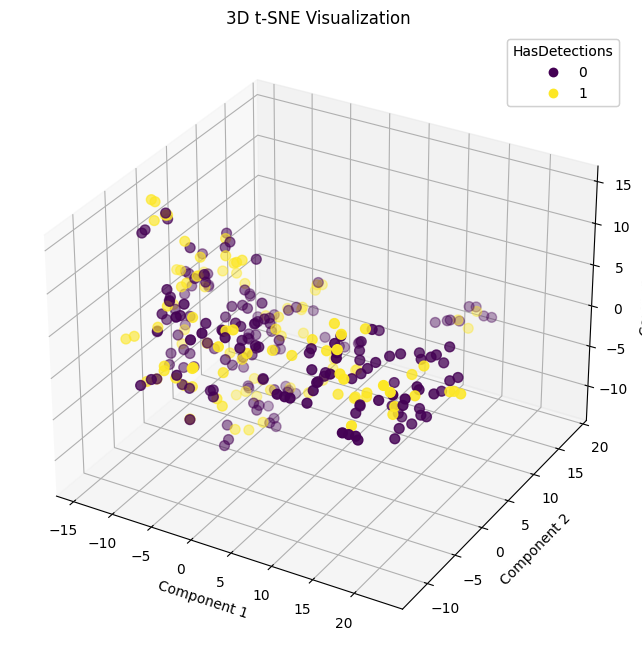

In [104]:
from mpl_toolkits.mplot3d import Axes3D


# t-SNE降维
tsne = TSNE(n_components=3, perplexity=5, n_iter=5000, random_state=42)
tsne_results = tsne.fit_transform(x)
tsneDf = pd.DataFrame(data=tsne_results, columns=['component 1', 'component 2', 'component 3'])

# 合并目标变量
finalDf = pd.concat([tsneDf, train[['S']]], axis=1)

# 使用Matplotlib的3D功能可视化
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
scatter = ax.scatter(finalDf['component 1'], finalDf['component 2'], finalDf['component 3'], c=finalDf['S'], cmap='viridis', s=50)

# 添加图例
legend1 = ax.legend(*scatter.legend_elements(), title="HasDetections")
ax.add_artist(legend1)

# 设置标签
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D t-SNE Visualization')

plt.show()